#import basics libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#laod dataset

In [ ]:
fraud=pd.read_csv('Fraud.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
fraud.shape

(600, 6)

In [ ]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
fraud.duplicated().sum()

0

In [ ]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

#Encoding

In [ ]:
le=preprocessing.LabelEncoder()
fraud['Undergrad']=le.fit_transform(fraud['Undergrad'])
fraud['Urban']=le.fit_transform(fraud['Urban'])
fraud['Marital.Status']=le.fit_transform(fraud['Marital.Status'])

In [ ]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [ ]:
#encoded the labels as 0= NO ,1=Yes for undergrad
#encoded the labels as 0= No ,1= Yes for  urban
#encoded the labels as 0 =divorced ,1=maried , 2 =single for Marital.Status

In [ ]:
fraud.Urban.value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [ ]:
fraud.Undergrad.value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

In [ ]:
fraud['Marital.Status'].value_counts()

2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [ ]:
tax=pd.cut(fraud['Taxable.Income'],bins=[0,30000,100000],labels=['risk','safe'])
tax

0      safe
1      safe
2      safe
3      safe
4      safe
       ... 
595    safe
596    safe
597    safe
598    safe
599    safe
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['risk' < 'safe']

In [ ]:
fraud['Taxable.Income']=le.fit_transform(tax)

In [ ]:
fraud['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [ ]:
#encoded the labels 0 as risk(<30000) and 1 ass safe(>30000) in taxable income

In [ ]:
x=fraud.drop(['Taxable.Income'],axis=1)
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [ ]:
y=fraud['Taxable.Income']
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((420, 5), (180, 5), (420,), (180,))

#Decision tree

#building classification model using entropy criteria

In [ ]:
model=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

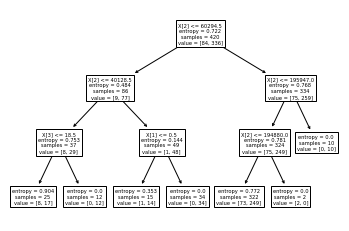

In [ ]:
tree.plot_tree(model)
import warnings
warnings.filterwarnings('ignore')

[Text(0.5769230769230769, 0.875, 'City.Population <= 60294.5\nentropy = 0.722\nsamples = 420\nvalue = [84, 336]\nclass = safe'),
 Text(0.3076923076923077, 0.625, 'City.Population <= 40128.5\nentropy = 0.484\nsamples = 86\nvalue = [9, 77]\nclass = safe'),
 Text(0.15384615384615385, 0.375, 'Work.Experience <= 18.5\nentropy = 0.753\nsamples = 37\nvalue = [8, 29]\nclass = safe'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.904\nsamples = 25\nvalue = [8, 17]\nclass = safe'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = safe'),
 Text(0.46153846153846156, 0.375, 'Marital.Status <= 0.5\nentropy = 0.144\nsamples = 49\nvalue = [1, 48]\nclass = safe'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.353\nsamples = 15\nvalue = [1, 14]\nclass = safe'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34]\nclass = safe'),
 Text(0.8461538461538461, 0.625, 'City.Population <= 195947.0\nentropy = 0.768\nsamples = 334\nvalue = [75, 

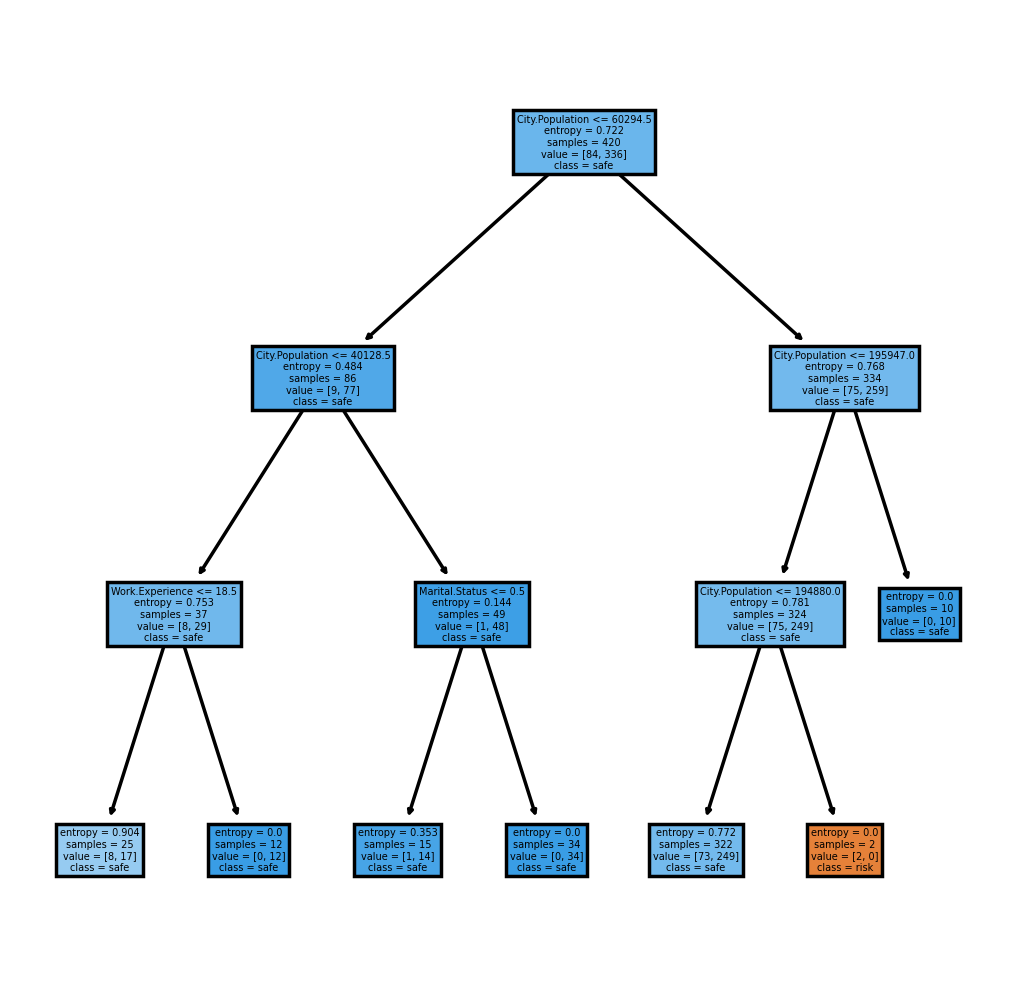

In [ ]:
fn=['Undergrad',	'Marital.Status',	'City.Population',	'Work.Experience',	'Urban']
cn=['risk','safe']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=250)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [ ]:
pred=model.predict(x_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
feature_importance = pd.Series(model.feature_importances_ , index = fn).sort_values(ascending = False)
feature_importance

City.Population    0.737223
Work.Experience    0.197385
Marital.Status     0.065392
Undergrad          0.000000
Urban              0.000000
dtype: float64

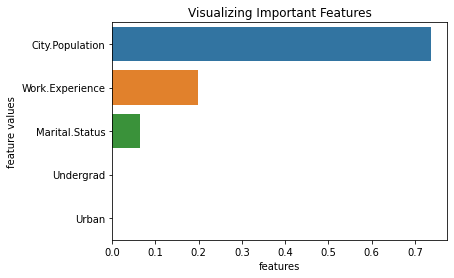

In [ ]:
import seaborn as sns
sns.barplot(x=feature_importance,y=feature_importance.index)
plt.xlabel('features')
plt.ylabel('feature values')
plt.title('Visualizing Important Features')
plt.show()

In [ ]:
model.score(x_train,y_train)

0.8047619047619048

In [ ]:
model.score(x_test,y_test)

0.7722222222222223

In [ ]:
#from the above model the train accuracy is quite better than test accuracy and overfitting is minimum  

CART decision tree

In [ ]:
model_2=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5416666666666666, 0.875, 'X[2] <= 60294.5\ngini = 0.32\nsamples = 420\nvalue = [84, 336]'),
 Text(0.3333333333333333, 0.625, 'X[2] <= 40128.5\ngini = 0.187\nsamples = 86\nvalue = [9, 77]'),
 Text(0.16666666666666666, 0.375, 'X[3] <= 18.5\ngini = 0.339\nsamples = 37\nvalue = [8, 29]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.435\nsamples = 25\nvalue = [8, 17]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.5, 0.375, 'X[1] <= 0.5\ngini = 0.04\nsamples = 49\nvalue = [1, 48]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.75, 0.625, 'X[2] <= 61835.0\ngini = 0.348\nsamples = 334\nvalue = [75, 259]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.375, 'X[2] <= 140941.5\ngini = 0.346\nsamples = 333\nvalue = [74, 259]'),
 Text(0.75, 0.125, 'gini = 0.379\nsamples = 209\nvalue 

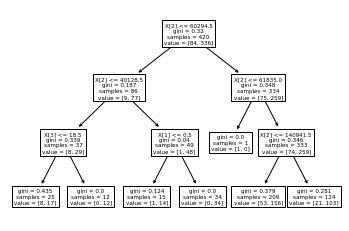

In [ ]:
tree.plot_tree(model_2)

In [ ]:
fi=pd.Series(model_2.feature_importances_,index=fn).sort_values(ascending=False)
fi

City.Population    0.770741
Work.Experience    0.217160
Marital.Status     0.012099
Undergrad          0.000000
Urban              0.000000
dtype: float64

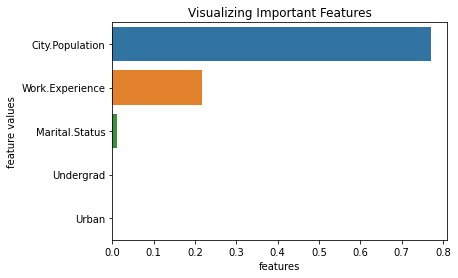

In [ ]:
sns.barplot(x=fi,y=fi.index)
plt.xlabel('features')
plt.ylabel('feature values')
plt.title('Visualizing Important Features')
plt.show()

[Text(0.5416666666666666, 0.875, 'City.Population <= 60294.5\ngini = 0.32\nsamples = 420\nvalue = [84, 336]\nclass = safe'),
 Text(0.3333333333333333, 0.625, 'City.Population <= 40128.5\ngini = 0.187\nsamples = 86\nvalue = [9, 77]\nclass = safe'),
 Text(0.16666666666666666, 0.375, 'Work.Experience <= 18.5\ngini = 0.339\nsamples = 37\nvalue = [8, 29]\nclass = safe'),
 Text(0.08333333333333333, 0.125, 'gini = 0.435\nsamples = 25\nvalue = [8, 17]\nclass = safe'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = safe'),
 Text(0.5, 0.375, 'Marital.Status <= 0.5\ngini = 0.04\nsamples = 49\nvalue = [1, 48]\nclass = safe'),
 Text(0.4166666666666667, 0.125, 'gini = 0.124\nsamples = 15\nvalue = [1, 14]\nclass = safe'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]\nclass = safe'),
 Text(0.75, 0.625, 'City.Population <= 61835.0\ngini = 0.348\nsamples = 334\nvalue = [75, 259]\nclass = safe'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples 

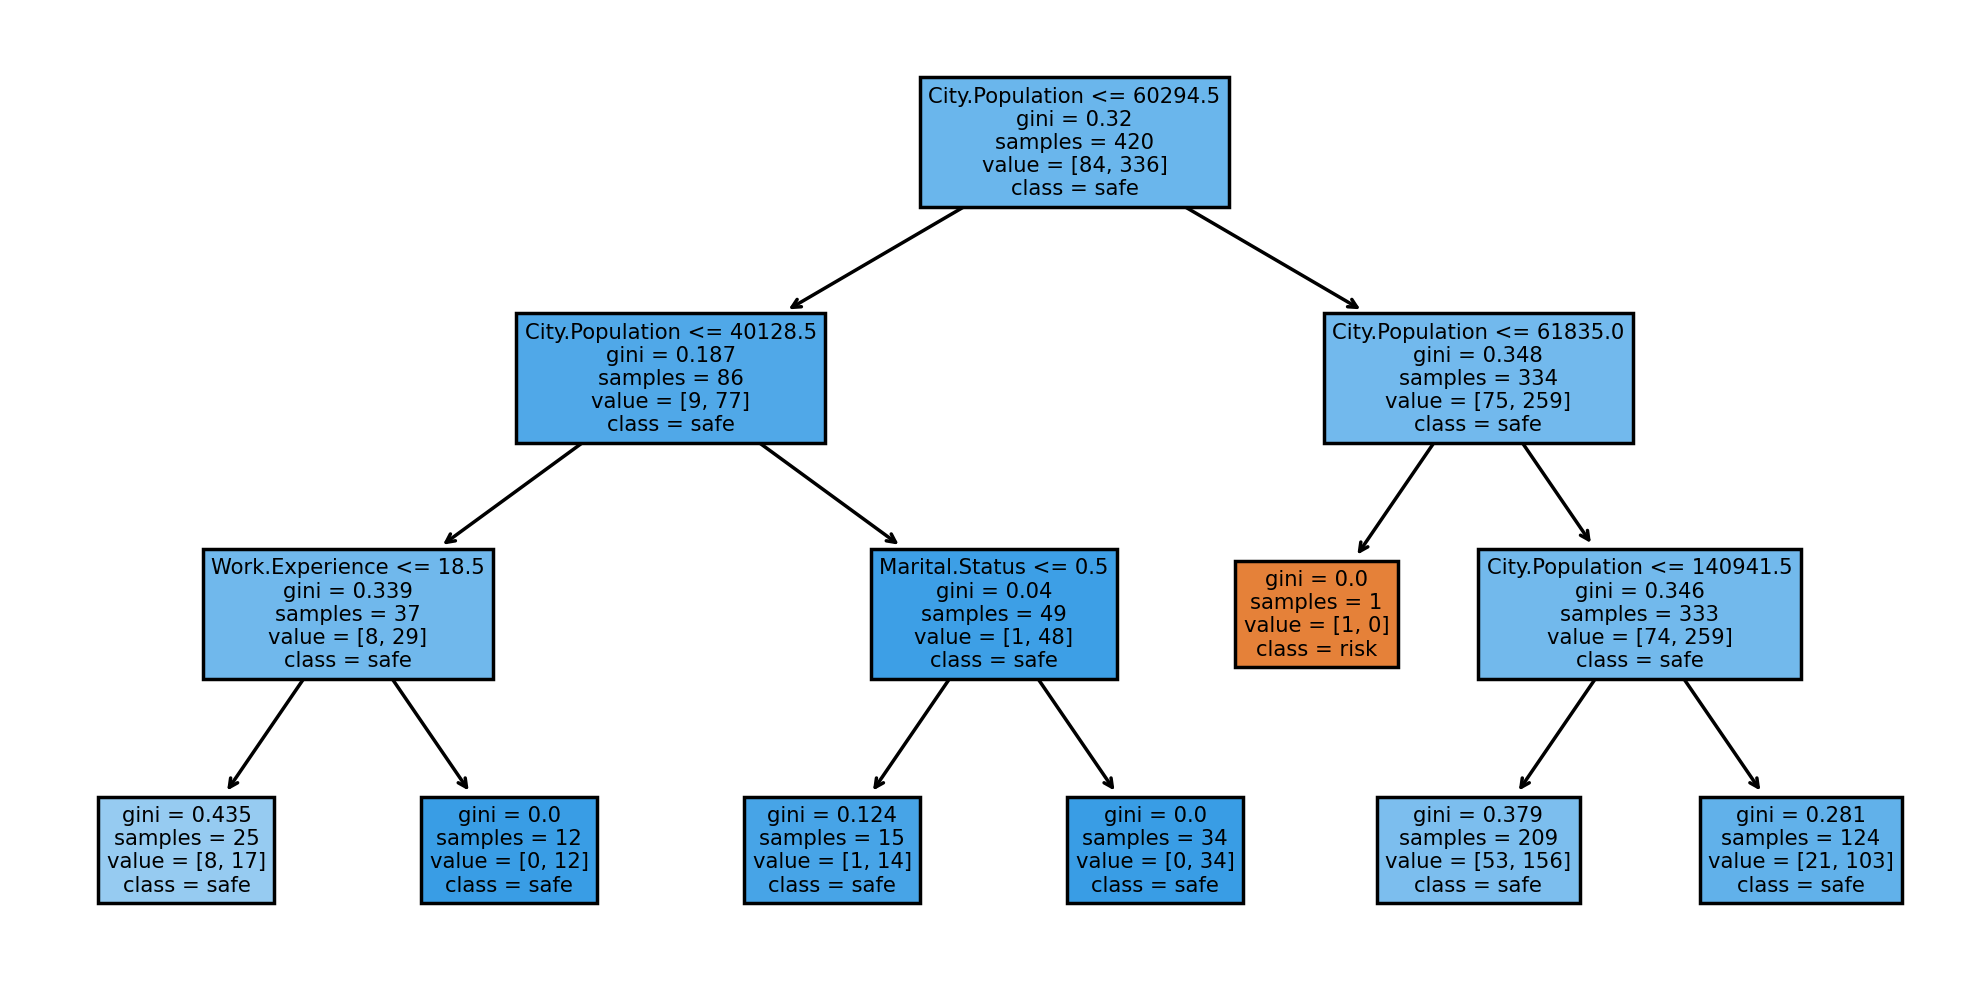

In [ ]:
plt.subplots(figsize=(10,5),dpi=250)
tree.plot_tree(model_2,feature_names=fn,class_names=cn,filled=True)

In [ ]:
pred=model_2.predict(x_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
model_2.score(x_train,y_train)

0.8023809523809524

In [ ]:
model_2.score(x_test,y_test)

0.7777777777777778

In [ ]:
#from the above model the train accuracy is quite better than test accuracy and overfitting is minimum and model gini is much better free from overfitting 